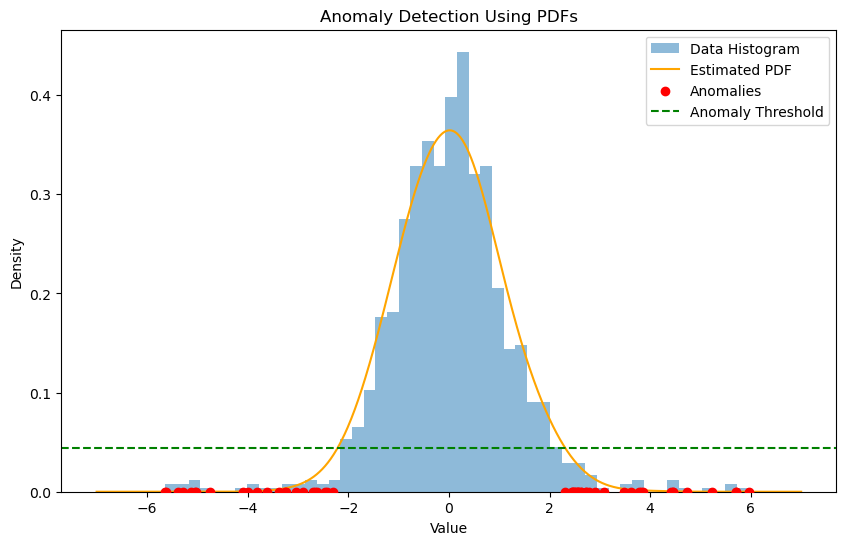

Number of detected anomalies: 53
True anomalies: 50
Detected anomalies that are true: 35


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from scipy.stats import norm

# Step 1: Generate synthetic data
np.random.seed(42)
normal_data = np.random.normal(loc=0, scale=1, size=1000)  # Normal distribution (mean=0, std=1)
anomalous_data = np.random.uniform(low=-6, high=6, size=50)  # Uniformly distributed anomalies

data = np.concatenate([normal_data, anomalous_data])
true_labels = np.concatenate([np.zeros_like(normal_data), np.ones_like(anomalous_data)])  # 0 = normal, 1 = anomaly

# Step 2: Estimate the PDF using Kernel Density Estimation
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(normal_data.reshape(-1, 1))

# Compute log density for each point
log_density = kde.score_samples(data.reshape(-1, 1))
density = np.exp(log_density)  # Convert log density to actual density

# Step 3: Set a threshold for anomaly detection
threshold = np.percentile(density, 5)  # Set threshold at the 5th percentile
anomalies = density < threshold

# Step 4: Visualize the results
plt.figure(figsize=(10, 6))
plt.hist(data, bins=50, density=True, alpha=0.5, label='Data Histogram')
x_vals = np.linspace(-7, 7, 1000).reshape(-1, 1)
pdf_vals = np.exp(kde.score_samples(x_vals))
plt.plot(x_vals, pdf_vals, label='Estimated PDF', color='orange')
plt.scatter(data[anomalies], [0] * sum(anomalies), color='red', label='Anomalies', zorder=5)
plt.axhline(y=threshold, color='green', linestyle='--', label='Anomaly Threshold')
plt.title('Anomaly Detection Using PDFs')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

# Step 5: Evaluate the results
print(f"Number of detected anomalies: {np.sum(anomalies)}")
print(f"True anomalies: {np.sum(true_labels == 1)}")
print(f"Detected anomalies that are true: {np.sum((anomalies == 1) & (true_labels == 1))}")


In [2]:
from scipy.stats import ks_2samp
import numpy as np

# Historical data and new data
historical_data = np.random.normal(50, 5, 100)
new_data = np.random.normal(55, 5, 100)

# Perform KS Test
statistic, p_value = ks_2samp(historical_data, new_data)
print("KS Statistic:", statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("Significant difference between the distributions (Data Drift).")
else:
    print("No significant difference between the distributions.")


KS Statistic: 0.34
P-value: 1.605714367105695e-05
Significant difference between the distributions (Data Drift).


In [3]:
from scipy.stats import chi2_contingency
import pandas as pd

# Example contingency table (2x2 table for clicks vs. platform)
data = pd.DataFrame({
    "Desktop": [50, 30],
    "Mobile": [20, 40]
}, index=["Clicked", "Not Clicked"])

# Perform Chi-Square Test
stat, p, dof, expected = chi2_contingency(data)
print("Chi-Square Statistic:", stat)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

if p < 0.05:
    print("There is a significant association between the variables.")
else:
    print("No significant association between the variables.")


Chi-Square Statistic: 10.529166666666667
P-value: 0.0011750518530845063
Degrees of Freedom: 1
Expected Frequencies:
 [[40. 30.]
 [40. 30.]]
There is a significant association between the variables.


In [4]:
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp, chi2_contingency

def load_data():
    # Load historical and new data (mock data here for demonstration)
    historical_data = pd.DataFrame({
        "Age": np.random.normal(40, 10, 1000),
        "Gender": np.random.choice(["Male", "Female"], 1000),
        "Clicks": np.random.choice(["Yes", "No"], 1000)
    })
    
    new_data = pd.DataFrame({
        "Age": np.random.normal(45, 12, 1000),
        "Gender": np.random.choice(["Male", "Female"], 1000),
        "Clicks": np.random.choice(["Yes", "No"], 1000)
    })
    
    return historical_data, new_data

def ks_test_continuous(historical_data, new_data, column):
    # KS Test for continuous columns
    statistic, p_value = ks_2samp(historical_data[column], new_data[column])
    result = {
        "Column": column,
        "KS Statistic": statistic,
        "P-Value": p_value,
        "Drift Detected": p_value < 0.05
    }
    return result

def chi_square_test_categorical(historical_data, new_data, column):
    # Chi-Square Test for categorical columns
    contingency_table = pd.crosstab(historical_data[column], new_data[column])
    stat, p_value, dof, expected = chi2_contingency(contingency_table)
    result = {
        "Column": column,
        "Chi-Square Statistic": stat,
        "P-Value": p_value,
        "Significant Difference": p_value < 0.05
    }
    return result

def generate_report(ks_results, chi_square_results):
    print("\n=== Data Quality Report ===\n")
    
    # KS Test Results
    print("Continuous Variable Drift Detection (KS-Test):")
    for result in ks_results:
        print(result)
    
    # Chi-Square Test Results
    print("\nCategorical Variable Relationship Validation (Chi-Square Test):")
    for result in chi_square_results:
        print(result)

def main_pipeline():
    historical_data, new_data = load_data()
    
    # Define continuous and categorical columns
    continuous_columns = ["Age"]
    categorical_columns = ["Gender", "Clicks"]
    
    # Run KS Test for continuous data
    ks_results = [ks_test_continuous(historical_data, new_data, col) for col in continuous_columns]
    
    # Run Chi-Square Test for categorical data
    chi_square_results = [chi_square_test_categorical(historical_data, new_data, col) for col in categorical_columns]
    
    # Generate Report
    generate_report(ks_results, chi_square_results)

if __name__ == "__main__":
    main_pipeline()



=== Data Quality Report ===

Continuous Variable Drift Detection (KS-Test):
{'Column': 'Age', 'KS Statistic': 0.203, 'P-Value': 1.942374946587825e-18, 'Drift Detected': True}

Categorical Variable Relationship Validation (Chi-Square Test):
{'Column': 'Gender', 'Chi-Square Statistic': 0.12926339571266451, 'P-Value': 0.7191970011827794, 'Significant Difference': False}
{'Column': 'Clicks', 'Chi-Square Statistic': 0.2548245487099607, 'P-Value': 0.6136982661288792, 'Significant Difference': False}
